C:\Users\Kuba\AppData\Local\Temp\ipykernel_2564\4055583538.py:13: RuntimeWarning: overflow encountered in double_scalars
  dir = br*T*Ir - a*Ir + (1-epsilon)*mi*bs*Is*T
C:\Users\Kuba\AppData\Local\Temp\ipykernel_2564\4055583538.py:13: RuntimeWarning: invalid value encountered in double_scalars
  dir = br*T*Ir - a*Ir + (1-epsilon)*mi*bs*Is*T
C:\Users\Kuba\anaconda3\lib\site-packages\matplotlib\ticker.py:2073: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


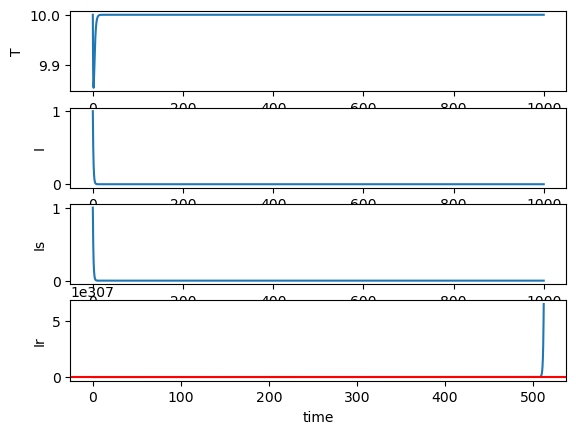

0.0002499999999999998
[nan, nan, nan, nan, nan]


In [1]:
import matplotlib.pyplot as plt
from numpy import array, zeros, arange


def HIV(state, t):
    T = state[0]  # T kom. podatne
    I = state[1]  # I kom. zainfekowane
    Is = state[2]  # zainfekowane komorki wrazliwe na leczenie
    Ir = state[3]  # ilosc wirusa odpornego na lek
    dT = L - d * T - (1-epsilon) * b * T * I
    di = (1-epsilon) * b * T * I - a * I
    dis = (1-epsilon) * (1 - mi) * bs * Is * T - a * Is
    dir = br*T*Ir - a*Ir + (1-epsilon)*mi*bs*Is*T
    return array([dT, di, dis, dir])


def Runge_Kutta(y, t, dt, derivative):
    k1 = dt * derivative(y, t)
    k2 = dt * derivative(y + k1 / 2., t + 0.5 * dt)
    k3 = dt * derivative(y + k2 / 2., t + 0.5 * dt)
    k4 = dt * derivative(y + k3, t + dt)
    y_next = y + 1 / 6. * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_next


d = 0.5  # szybkosc apoptozy kom. podatnych
L = 5  # L szybkosc odtwa. kom. podatnych
b = 0.25  # szybkosc infekowania kom. podatnych
a = 1  # szybkosc niszczenia kom. zak.jan

epsilon = 0.9 # wspolczynnik zredukowania infekcji

bs = 0.25
br = 0.24
mi = 10**(-5) # mutacja wirusa
stabline = mi / (1-(br/bs))

Npodatne = 10 ** 9  # initial conditions 30*10**12 calkowita liczba kom.

To = L/d
Io = 1
Iro = stabline

dt = 0.1
to = 0
te = 10**3
t = arange(to, te, dt)
N = len(t)
y = zeros([N, 4])
y[0, 0] = To
y[0, 1] = Io
y[0, 2] = Io
y[0, 3] = Iro

for i in range(N - 1):
    y[i + 1] = Runge_Kutta(y[i], t[i], dt, HIV)

Tt = [y[j, 0] for j in range(N)]
It = [y[j, 1] for j in range(N)]
Ist = [y[j, 2] for j in range(N)]
Irt = [y[j, 3] for j in range(N)]

plt.subplot(4, 1, 1)
plt.plot(t, Tt)
plt.ylabel("T")
plt.xlabel("time")
plt.subplot(4, 1, 2)
plt.plot(t, It)
plt.ylabel("I")
plt.xlabel("time")
plt.subplot(4, 1, 3)
plt.plot(t, Ist)
plt.ylabel("Is")
plt.xlabel("time")
plt.subplot(4, 1, 4)
plt.plot(t, Irt)
plt.axhline(y=stabline, color='r', linestyle='-')
plt.ylabel("Ir")
plt.xlabel("time")
plt.show()

print(stabline)
print(Irt[-5:])